# Exercises

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')       # Use ggplot style plots
%matplotlib inline

athletes = pd.read_csv("athletes.csv")
countries = pd.read_csv("countries.csv")
print(athletes.shape)
print(athletes.columns)
print(athletes.dtypes)

print(countries.shape)
print(countries.columns)
print(countries.dtypes)

print(athletes.head(10))
countries.head(20)

(11538, 11)
Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')
id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object
(201, 2)
Index(['country', 'code'], dtype='object')
country    object
code       object
dtype: object
          id                 name nationality     sex       dob  height  \
0  736041664       A Jesus Garcia         ESP    male  10/17/69    1.72   
1  532037425           A Lam Shin         KOR  female   9/23/86    1.68   
2  435962603          Aaron Brown         CAN    male   5/27/92    1.98   
3  521041435           Aaron Cook         MDA    male    1/2/91    1.83   
4   33922579           Aaron Gate         NZL    male  11/26/90    1.81   
5  173071782          Aaron Royl

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND
5,Angola,ANG
6,Antigua and Barbuda,ANT
7,Argentina,ARG
8,Armenia,ARM
9,Aruba*,ARU


In [38]:
# Renaming nationality to country

#athletes =athletes.rename(columns={'nationality': 'country'})
#athletes.head(5)

#athletes.index = ('country')
#country.index = ('country')

combined1 = pd.merge(countries,
                     athletes,                           
                    how="right",   # Merge method
                    on='country')     # Column(s) to join on

In [44]:
#combined1= combined1.set_index('country')
combined1.shape
combined1= combined1.sort()
combined1.head()

/Users/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  app.launch_new_instance()


,code,id,name,sex,dob,height,weight,sport,gold,silver,bronze
country,,,,,,,,,,,
AFG,NaN,152408417,Abdul Wahab Zahiri,male,5/27/92,1.75,68.0,athletics,0,0,0
AFG,NaN,289057786,Mohammad Tawfiq Bakhshi,male,3/11/86,1.81,99.0,judo,0,0,0
AFG,NaN,103254143,Kamia Yousufi,female,5/20/96,1.65,55.0,athletics,0,0,0
ALB,NaN,345441615,Briken Calja,male,2/19/90,1.70,69.0,weightlifting,0,0,0
ALB,NaN,103773001,Evagjelia Veli,female,7/16/91,1.60,52.0,weightlifting,0,0,0


## 1. What was the average age in male and female athletes?

In [226]:
from dateutil.relativedelta import relativedelta

import datetime as datetime
birth_dates= pd.to_datetime(combined1['dob'])
combined1['dob']= birth_dates

olym_date= pd.to_datetime("8/05/16")
combined1['olym_date'] = olym_date
combined1.head()
# apply

def age(row):
    try:
        age = relativedelta(row['olym_date'], row['dob']).years
        return age 
    except:
        pass
    
combined1['age']= combined1.apply(lambda x:  age(x), 1) 

In [229]:
combined1.groupby(['sex'])['age'].mean()

sex
female    25.539289
male      26.165035
Name: age, dtype: float64

## 2. What are the most common Dates of Birth?

In [142]:
pop_dobs =combined1.groupby(['dob'])['id'].count()
pop_dobs= pd.DataFrame(pop_dobs)
pop_dobs = pop_dobs.sort_values('id', ascending=False)
pop_dobs.head()


,id
dob,
1988-03-05,9
1990-12-20,9
1993-02-18,9
1991-06-19,8
1988-04-03,8


In [242]:
combined1

,code,id,name,sex,dob,height,weight,sport,gold,silver,bronze,olym_date,age,weekday_dob
country,,,,,,,,,,,,,,
AFG,NaN,152408417,Abdul Wahab Zahiri,male,1992-05-27,1.75,68.0,athletics,0,0,0,2016-08-05,24.0,2.0
AFG,NaN,289057786,Mohammad Tawfiq Bakhshi,male,1986-03-11,1.81,99.0,judo,0,0,0,2016-08-05,30.0,1.0
AFG,NaN,103254143,Kamia Yousufi,female,1996-05-20,1.65,55.0,athletics,0,0,0,2016-08-05,20.0,0.0
ALB,NaN,345441615,Briken Calja,male,1990-02-19,1.70,69.0,weightlifting,0,0,0,2016-08-05,26.0,0.0
ALB,NaN,103773001,Evagjelia Veli,female,1991-07-16,1.60,52.0,weightlifting,0,0,0,2016-08-05,25.0,1.0
ALB,NaN,324317073,Izmir Smajlaj,male,1993-03-29,1.95,86.0,athletics,0,0,0,2016-08-05,23.0,0.0
ALB,NaN,915002256,Luiza Gega,female,1988-11-05,1.59,45.0,athletics,0,0,0,2016-08-05,27.0,5.0
ALB,NaN,539021692,Nikol Merizaj,female,1998-08-07,1.80,65.0,aquatics,0,0,0,2016-08-05,17.0,4.0
ALB,NaN,997380920,Sidni Hoxha,male,1992-06-01,1.93,87.0,aquatics,0,0,0,2016-08-05,24.0,0.0


## 3. How about the most common birthdays?

In [245]:
def Date(row):
    try:
        dt = row['dob'].strftime('%Y-%m-%d')
        return str(dt.split('-')[1:3])
    except:
        pass


In [250]:
# Used .value_counts
birth_date = combined1.apply(lambda x: Date(x),1)
birth_date = pd.DataFrame(birth_date)
birth_date.columns = ['b_day']
birth_date['b_day'].value_counts().reset_index().head()

,index,b_day
0,"['01', '01']",58
1,"['02', '05']",51
2,"['02', '10']",48
3,"['01', '10']",47
4,"['09', '19']",47


## 4. What are the Countries with more than 100 medals?

In [271]:
medals = combined1[['gold','silver','bronze']]
medals.head()

,gold,silver,bronze
country,,,
AFG,0,0,0
AFG,0,0,0
AFG,0,0,0
ALB,0,0,0
ALB,0,0,0


In [326]:
#medals.ix['USA']['bronze'].sum()
#medals_won[medals_won['country'] == 'USA']['medals'].sum()
#medals_won_ranking = medals_won.groupby(["country"])['medals'].sum()
medals_won_ranking.ix['USA']

264

In [332]:
# Required a transpose on the DF setup
medals_won = medals.sum(axis =1)
medals_won = pd.DataFrame([medals_won.index, medals_won]).T
medals_won.columns= ["country", "medals"]
medals_won_ranking = medals_won.groupby(["country"]).sum()
medals_above_hundred = medals_won_ranking[medals_won_ranking['medals'] >100].sort(ascending = False)
medals_above_hundred


/Users/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,medals
country,
USA,264
RUS,115
GER,160
GBR,145
CHN,113


## 5. Create a bar or pie chart for the results of the previous exercise.

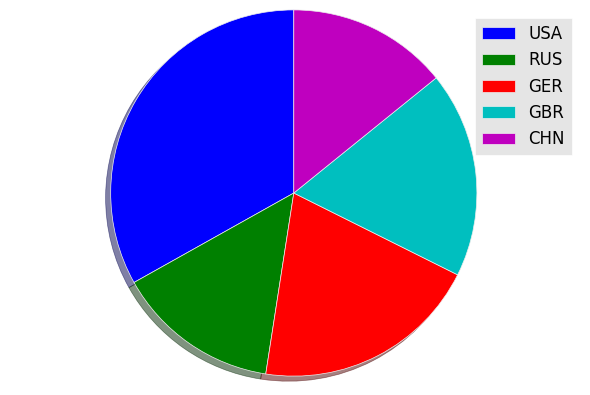

In [335]:
# Copied directly from the solution video 
labels = list(medals_above_hundred.index)
medals = list(medals_above_hundred['medals'])

patches, texts = plt.pie(medals, shadow= True, startangle = 90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

In [357]:
combined1['sport'].unique()

array(['athletics', 'judo', 'weightlifting', 'aquatics', 'football',
       'fencing', 'sailing', 'wrestling', 'boxing', 'gymnastics',
       'cycling', 'rowing', 'shooting', 'handball', 'golf', 'volleyball',
       'canoe', 'hockey', 'modern pentathlon', 'basketball', 'tennis',
       'rugby sevens', 'equestrian', 'triathlon', 'taekwondo',
       'table tennis', 'badminton', 'archery'], dtype=object)

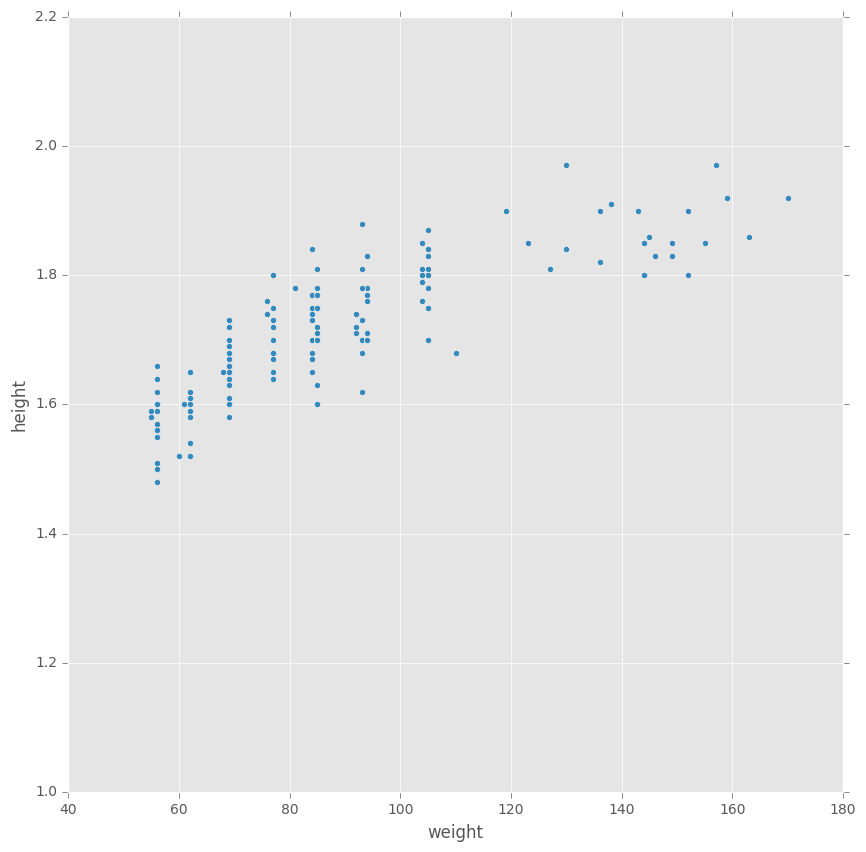

In [359]:
# My scatterplot's not as clean as the solution hmm ???
male_weight_lift = combined1[(combined1['sport'] == 'weightlifting') & (combined1['sex'] == "male")]

male_weight_lift.plot(kind = "scatter",
    x= 'weight', 
    y= 'height',
    figsize=(10,10),
    ylim=(1,2.2))

## 7. Generate a histogram of male and female height distribution among all participants.

In [360]:
f_height= combined1[combined1['sex'] =='female']
m_height= combined1[combined1['sex'] =='male']

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   2.90000000e+01,   2.24000000e+02,
          6.63000000e+02,   1.34100000e+03,   1.32100000e+03,
          9.95000000e+02,   3.23000000e+02,   1.22000000e+02,
          3.10000000e+01,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([ 1.    ,  1.0625,  1.125 ,  1.1875,  1.25  ,  1.3125,  1.375 ,
         1.4375,  1.5   ,  1.5625,  1.625 ,  1.6875,  1.75  ,  1.8125,
         1.875 ,  1.9375,  2.    ,  2.0625,  2.125 ,  2.1875,  2.25  ,
         2.3125,  2.375 ,  2.4375,  2.5   ]),
 <a list of 24 Patch objects>)

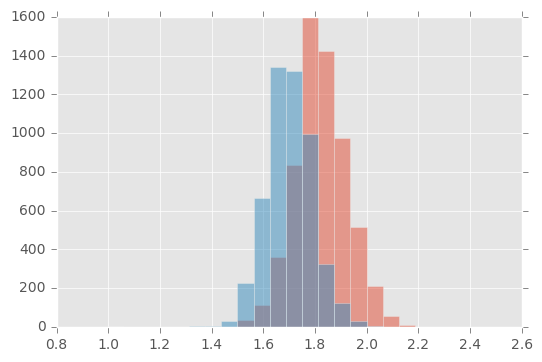

In [365]:
bins = np.linspace(1.0, 2.5, 25)
plt.hist(m_height['height'].dropna(), bins= bins, alpha=.5)
plt.hist(f_height['height'].dropna(), bins= bins, alpha=.5)

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

In [367]:
# Not sure why I don't have seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.boxplot(x='sex', y='height', data=combined1)

ImportError: No module named 'seaborn'

## 9. Create a world map for countries and their respective amount of medals in Carto. [Carto](http://carto.com) provides a quick and easy way to create maps. For this you will also need to use 'countries.csv'.

In [369]:
# Already joined tables at the outset thinking that we'd need to
medals_won_ranking.to_csv("Olympic_medal_count.csv")

## 10. _Optional_: What else would you try?